In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#Importing kaggle df link: https://www.kaggle.com/datasets/uom190346a/global-coffee-health-dataset

df = pd.read_csv("synthetic_coffee_health_10000.csv")

In [6]:
df.head()


,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [8]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')

data_to_encode = df[['Stress_Level', 'Sleep_Quality', 'Country', 'Gender', 'Occupation']]

encoded_array = enc.fit_transform(data_to_encode).toarray()

In [9]:
encoded_cols = enc.get_feature_names_out(data_to_encode.columns)

In [10]:
encoded_cols = enc.get_feature_names_out(data_to_encode.columns)
encoded_df = pd.DataFrame(encoded_array, columns=encoded_cols, index=df.index)
df_final = df.drop(columns=data_to_encode.columns).join(encoded_df)

df_final['Health_Issues'] = df['Health_Issues'].fillna('Good')

df_final.head(10)






,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Health_Issues,Smoking,...,Country_UK,Country_USA,Gender_Female,Gender_Male,Gender_Other,Occupation_Healthcare,Occupation_Office,Occupation_Other,Occupation_Service,Occupation_Student
0,1,40,3.5,328.1,7.5,24.9,78,14.5,Good,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,33,1.0,94.1,6.2,20.0,67,11.0,Good,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,42,5.3,503.7,5.9,22.7,59,11.2,Mild,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4,53,2.6,249.2,7.3,24.7,71,6.6,Mild,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,32,3.1,298.0,5.3,24.1,76,8.5,Mild,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,6,32,3.4,326.4,6.4,27.0,82,8.8,Good,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,7,53,2.7,252.1,7.8,24.3,58,1.0,Mild,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7,8,44,4.5,423.5,5.5,15.8,62,0.7,Mild,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,9,29,1.7,162.0,7.1,21.7,60,2.2,Good,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9,10,41,4.0,383.2,6.4,30.4,69,11.9,Mild,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [11]:
from sklearn.preprocessing import StandardScaler

X = df_final.drop('Health_Issues', axis=1)
y = df_final['Health_Issues']

# As we see below we have One-hot encoded all the different features (Apart from the target y), ready for standard scaling
X.head(2)



,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption,...,Country_UK,Country_USA,Gender_Female,Gender_Male,Gender_Other,Occupation_Healthcare,Occupation_Office,Occupation_Other,Occupation_Service,Occupation_Student
0,1,40,3.5,328.1,7.5,24.9,78,14.5,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,33,1.0,94.1,6.2,20.0,67,11.0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=136,
    stratify=y
)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [15]:
#get predictions

y_pred = model.predict(X_val_scaled)


In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))


Accuracy: 0.8975
              precision    recall  f1-score   support

        Good       0.92      0.96      0.94      1188
        Mild       0.87      0.84      0.86       716
    Moderate       0.70      0.55      0.61        93
      Severe       0.00      0.00      0.00         3

    accuracy                           0.90      2000
   macro avg       0.62      0.59      0.60      2000
weighted avg       0.89      0.90      0.89      2000

[[1140   48    0    0]
 [  93  604   19    0]
 [   0   41   51    1]
 [   0    0    3    0]]


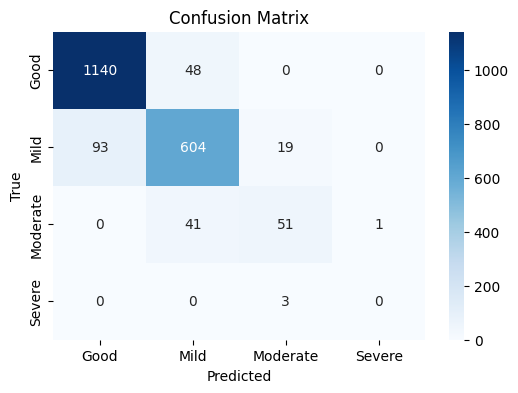

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_val, y_pred, labels=model.classes_)

# Plot
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [19]:
# Collapse Health_Issues into binary: Good vs Issue
df_binary = df_final.copy()

df_binary['Health_Issues'] = df_binary['Health_Issues'].replace({
    'Mild': 'Issue',
    'Moderate': 'Issue',
    'Severe': 'Issue',
    'Good': 'Good'
})

df_binary['Health_Issues'].value_counts()


Health_Issues
Good     5941
Issue    4059
Name: count, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

# Features and target
X = df_binary.drop(['Health_Issues', 'ID'], axis=1)
y = df_binary['Health_Issues']



# Split data
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=136,
    stratify=y
)

print("Train size:", X_train.shape, "Val size:", X_val.shape)


Train size: (8000, 44) Val size: (2000, 44)


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit on training only
X_train_scaled = scaler.fit_transform(X_train)

# Transform validation using same scaler
X_val_scaled = scaler.transform(X_val)


In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, class_weight="balanced")

#Train the model
model.fit(X_train_scaled, y_train)   # <-- fill this in


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


Accuracy: 0.9225
              precision    recall  f1-score   support

        Good       0.93      0.94      0.93      1188
       Issue       0.91      0.90      0.90       812

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



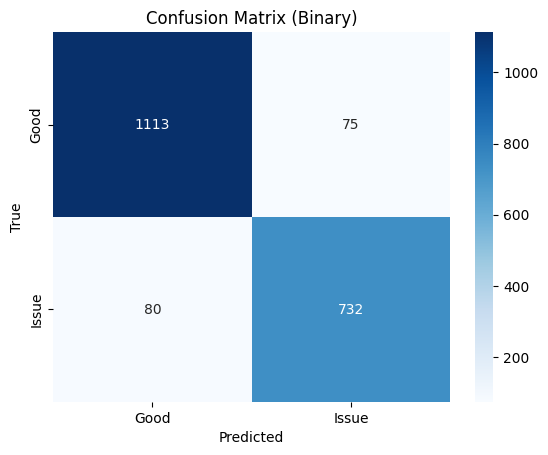

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_pred = model.predict(X_val_scaled)  # <-- fill this in

# Metrics
print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

# Confusion matrix
cm = confusion_matrix(y_val, y_pred, labels=model.classes_)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Binary)")
plt.show()


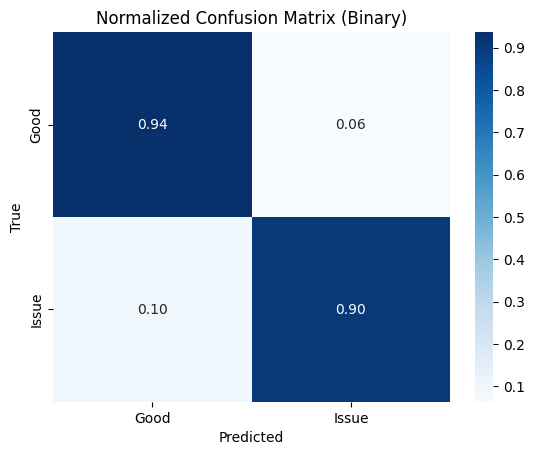

In [24]:
import numpy as np
cm = confusion_matrix(y_val, y_pred, labels=model.classes_)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Normalized Confusion Matrix (Binary)")
plt.show()


In [25]:
coef = model.coef_[0]   # model.coef_ is 2D (1 row for binary)
features = X.columns

coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coef
})

coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
coef_df.head(10)

,Feature,Coefficient
0,Age,2.088953
4,BMI,1.609445
11,Stress_Level_Medium,1.462195
13,Sleep_Quality_Fair,1.462195
15,Sleep_Quality_Poor,1.034809
9,Stress_Level_High,1.034809
18,Country_Brazil,0.097402
24,Country_India,0.096256
33,Country_Switzerland,0.087762
32,Country_Sweden,0.068207


In [26]:
# Top 10 positive (risk factors)
print(coef_df.sort_values(by="Coefficient", ascending=False).head(10))

# Top 10 negative (protective factors)
print(coef_df.sort_values(by="Coefficient", ascending=True).head(10))

# Here we see top contributions to our target variable. Not surprising to see Age, BMI and Stress levels to be up there


                Feature  Coefficient
0                   Age     2.088953
4                   BMI     1.609445
11  Stress_Level_Medium     1.462195
13   Sleep_Quality_Fair     1.462195
15   Sleep_Quality_Poor     1.034809
9     Stress_Level_High     1.034809
18       Country_Brazil     0.097402
24        Country_India     0.096256
33  Country_Switzerland     0.087762
32       Country_Sweden     0.068207
                    Feature  Coefficient
10         Stress_Level_Low    -1.950988
14       Sleep_Quality_Good    -1.226654
12  Sleep_Quality_Excellent    -0.842533
22           Country_France    -0.133823
6   Physical_Activity_Hours    -0.112018
29           Country_Norway    -0.096999
27           Country_Mexico    -0.075669
5                Heart_Rate    -0.067280
16        Country_Australia    -0.061445
8       Alcohol_Consumption    -0.043480


In [27]:
import numpy as np
import pandas as pd

# Get coefficients
coef = model.coef_[0]   # since binary classification
features = X.columns

# Standard deviation of each feature (from training set)
feature_stds = X_train.std(axis=0)

# Standardized importance = |coef| × std
importance = np.abs(coef) * feature_stds

# Put in DataFrame
importance_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coef,
    'StdDev': feature_stds,
    'StdImportance': importance
})

# Sort by importance
importance_df = importance_df.sort_values(by='StdImportance', ascending=False)
importance_df.head(10)


,Feature,Coefficient,StdDev,StdImportance
Age,Age,2.088953,11.207091,23.411091
BMI,BMI,1.609445,3.887284,6.256370
Caffeine_mg,Caffeine_mg,-0.030243,137.885322,4.170004
Stress_Level_Low,Stress_Level_Low,-1.950988,0.458613,0.894748
Heart_Rate,Heart_Rate,-0.067280,9.841245,0.662117
Sleep_Quality_Good,Sleep_Quality_Good,-1.226654,0.495706,0.608059
Sleep_Quality_Fair,Sleep_Quality_Fair,1.462195,0.403909,0.590594
Stress_Level_Medium,Stress_Level_Medium,1.462195,0.403909,0.590594
Physical_Activity_Hours,Physical_Activity_Hours,-0.112018,4.323178,0.484274
Sleep_Quality_Poor,Sleep_Quality_Poor,1.034809,0.293923,0.304154


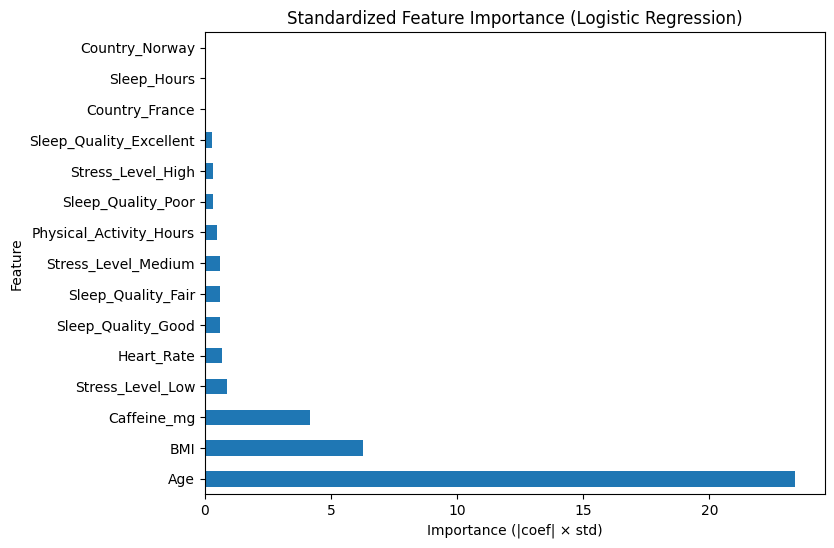

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
importance_df.head(15).set_index('Feature')['StdImportance'].plot(kind='barh')
plt.title("Standardized Feature Importance (Logistic Regression)")
plt.xlabel("Importance (|coef| × std)")
plt.ylabel("Feature")
plt.show()


In [29]:
def predict_health(model, scaler, input_data):
    """
    Predicts health status in a simple, human-friendly way.
    """
    import pandas as pd

    # Convert dictionary into DataFrame
    df_input = pd.DataFrame([input_data])

    # Scale features
    df_input_scaled = scaler.transform(df_input)

    # Predictions
    prediction = model.predict(df_input_scaled)[0]
    probability = model.predict_proba(df_input_scaled)[0]

    # Confidence (probability of predicted class)
    if prediction == "Good":
        confidence = probability[0] * 100
    else:
        confidence = probability[1] * 100

    # Build message
    print("🩺 Health Prediction")
    print("--------------------")
    if prediction == "Good":
        print(f"✅ This person is predicted to be in GOOD health.")
        print(f"Confidence: {confidence:.1f}%")
    else:
        print(f"⚠️ This person is predicted to have HEALTH ISSUES.")
        print(f"Confidence: {confidence:.1f}%")

    return prediction, probability




# Create a template dictionary with all feature names from training
template_input = {col: 0 for col in X.columns}

# Preview first 10 keys
list(template_input.items())[:10]


[('Age', 0),
 ('Coffee_Intake', 0),
 ('Caffeine_mg', 0),
 ('Sleep_Hours', 0),
 ('BMI', 0),
 ('Heart_Rate', 0),
 ('Physical_Activity_Hours', 0),
 ('Smoking', 0),
 ('Alcohol_Consumption', 0),
 ('Stress_Level_High', 0)]

In [30]:
# Copy the template
sample_person = template_input.copy()

# Fill in actual values
sample_person.update({
    "Age": 40,
    "BMI": 29.5,
    "Coffee_Intake": 1.0,
    "Caffeine_mg": 0,
    "Sleep_Hours": 8,
    "Heart_Rate": 70,
    "Physical_Activity_Hours": 4.0,
    "Gender_Male": 1,
    "Country_UK": 1,
    "Occupation_Office": 1
})


In [31]:
pred, prob = predict_health(model, scaler, sample_person)
print("Prediction:", pred)
print("Probabilities:", prob)


🩺 Health Prediction
--------------------
⚠️ This person is predicted to have HEALTH ISSUES.
Confidence: 99.9%
Prediction: Issue
Probabilities: [9.28303801e-04 9.99071696e-01]


In [32]:
import joblib
joblib.dump(model, "model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']